# UT2000 Home Environment Exploratory Analysis
We now take a closer look at the beacon and home environment survey data to see if we can tease anything out of it or at least show something. 

In [2]:
import math

# Data Import
We have two things to import: (1) the home environment survey and (2) the beacon data

In [3]:
import pandas as pd
import numpy as np
import os
from datetime import datetime

## Home Environment Survey
The get the home environment survey data, please make sure to run ```$ python3 src/data/make_dataset.py``` and choose the option for the HEH survey. This will combine, clean, and save the home environment survey data to the processed data directory.

In [4]:
HEH = pd.read_csv(f'/Users/hagenfritz/Projects/utx000/data/processed/ut3000-heh.csv')
HEH.head()

,record_id,livingsit,describe_other,hsrm_mates,amt_fem_house,amt_male_house,amt_nonbin_house,smoke,vape,pets,...,shower_amt,electric_scooters,electric_scooters_day,electric_scooters_week,home_environment_health_complete,study,record,beiwe,beacon,roommates
0,1025,Apartment,0.0,Roommates,0.0,3.0,0.0,0.0,0.0,0,...,7.0,Yes,1.0,7.0,Complete,ut1000,1025,2qki3fim,0.0,3.0
1,1041,Apartment,0.0,Roommates,0.0,2.0,0.0,0.0,0.0,0,...,9.0,No,0.0,0.0,Complete,ut1000,1041,ygny19ey,0.0,2.0
2,1063,Dormitory,0.0,Roommates,1.0,0.0,0.0,0.0,0.0,0,...,2.0,Yes,1.0,1.0,Complete,ut1000,1063,wozr2hv8,0.0,1.0
3,1065,Dormitory,0.0,Roommates,2.0,0.0,0.0,0.0,0.0,0,...,7.0,No,0.0,1.0,Complete,ut1000,1065,11i3mr4n,0.0,2.0
4,1083,Dormitory,0.0,Roommates,1.0,0.0,0.0,0.0,0.0,Other,...,7.0,No,0.0,0.0,Complete,ut1000,1083,5buzzcr7,0.0,1.0


## Beacons
To get the beacon data for the UT2000 study, be sure ture run ```$ python3 src/data/make_dataset.py``` and chooose the option for the ut2000 beacons. This will combine, clean, and save the beacon data to the processed data directory.

In [5]:
beacons = pd.read_csv(f'/Users/hagenfritz/Projects/utx000/data/processed/ut2000-beacon.csv',
                      index_col=0,parse_dates=True,infer_datetime_format=True)
beacons.head()

,pm1.0,pm2.5,pm10,std1.0,std2.5,std10,pc0.3,pc0.5,pc1.0,pc2.5,pc5.0,pc10.0,eco2,TVOC,RH,TC,number
datetime,,,,,,,,,,,,,,,,,
2019-02-26 16:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,0.0,37.032035,24.563401,6
2019-02-26 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.5,3.5,37.022877,24.556725,6
2019-02-26 17:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.5,0.0,37.101476,24.556725,6
2019-02-26 17:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,403.5,0.5,37.025167,24.612802,6
2019-02-26 17:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,411.0,13.5,37.095371,24.584764,6


# Visualization and Analysis
Now we get to the meat of it - visualizing and doing some simple statistics on the data.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

## Heat Maps

In [7]:
def plot_heat_map(df):
    '''
    
    '''
    
    fig,ax = plt.subplots(figsize=(8,6))
    df = df/np.nanmax(df)
    sns.heatmap(data=df,cmap='inferno_r',cbar=True,cbar_kws={'ticks':[]},square=False,ax=ax)
    ax.text(25,27.4,'Minimum',bbox={'facecolor':'white'},zorder=10)
    ax.text(25,-1,'Maximum',bbox={'facecolor':'white'},zorder=10)
    labels = []
    for d in df.index:
        dd = datetime(d.year,d.month,d.day)
        if dd >= datetime(2019,3,18) and dd <= datetime(2019,3,23):
            labels.append(datetime.strftime(d,'%a %m/%d')+'*')
        else:
            labels.append(datetime.strftime(d,'%a %m/%d'))
    ax.set_yticklabels(labels)
    ax.set_ylabel('Day in 2019')
    ax.set_xlabel('Hour of Day')

    return ax

### per Beacon
The following cell creates heat maps for each beacon for each sensor.

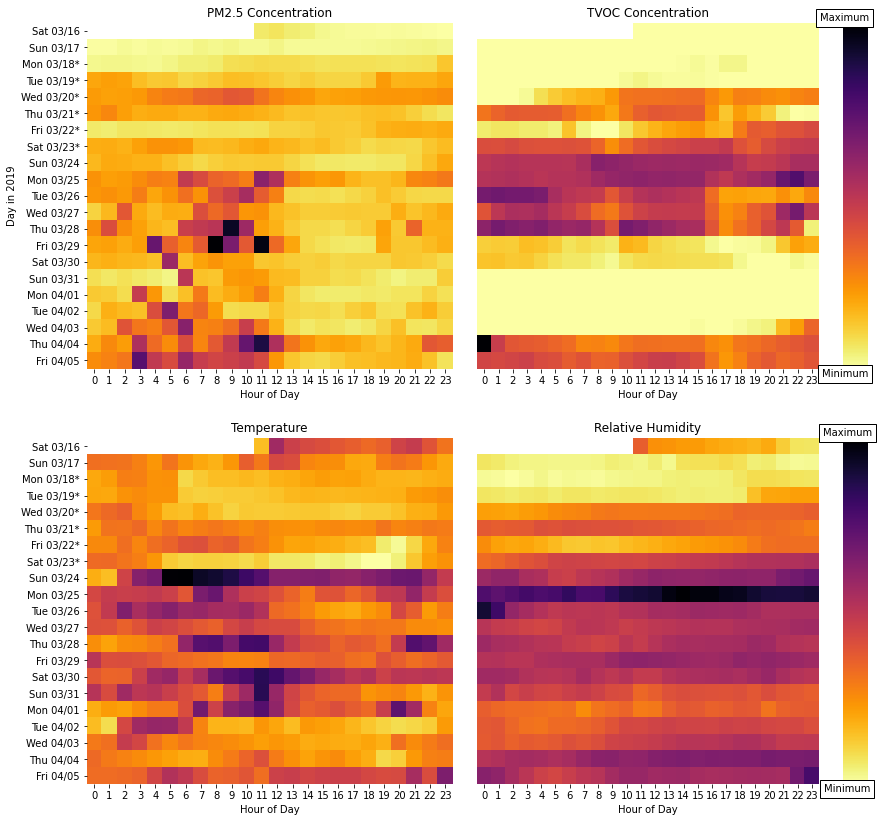

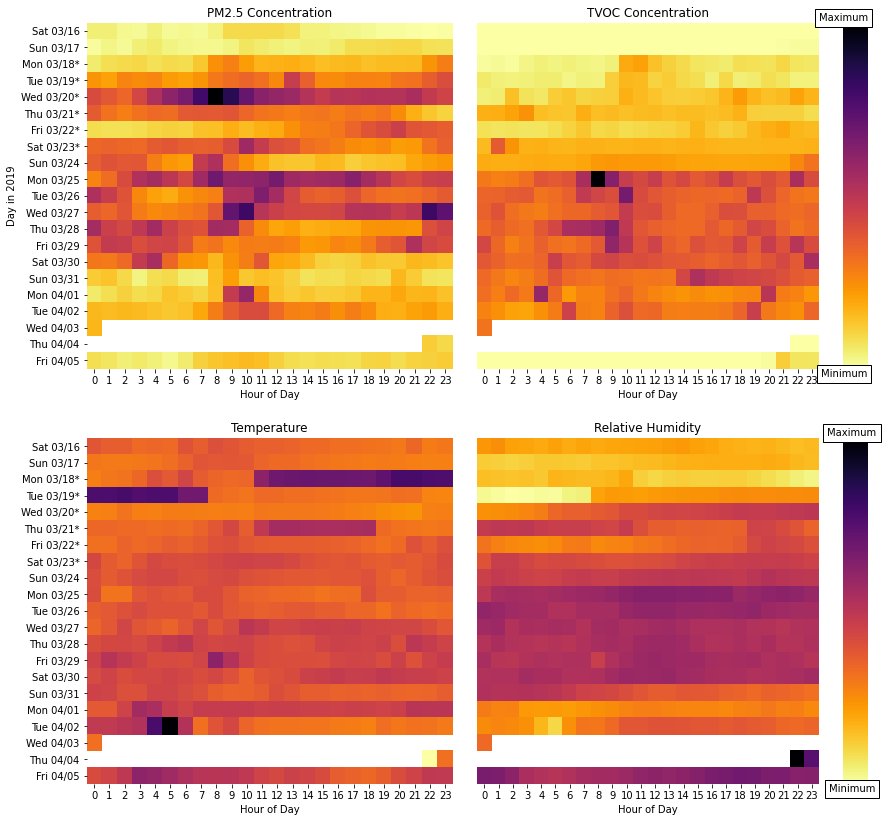

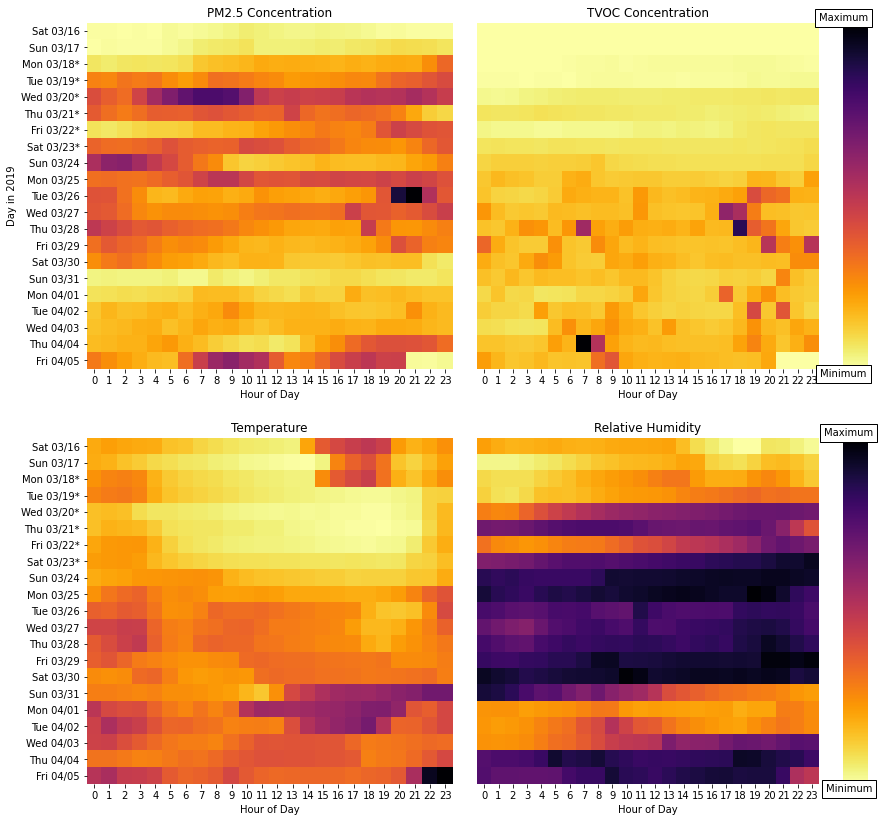

In [8]:
for b in [1,2,5]:
    df = beacons[beacons['number'] == b]
    df = df.resample('1h').mean()
    df['hour'] = df.index.hour
    df['day'] = df.index.date
    df = df.dropna()
    df = df[datetime(2019,3,16):datetime(2019,4,5,23)]
    df_pm = df.pivot_table(index='day',columns='hour',values='pm2.5')
    df_tc = df.pivot_table(index='day',columns='hour',values='TC')
    df_rh = df.pivot_table(index='day',columns='hour',values='RH')
    df_tvoc = df.pivot_table(index='day',columns='hour',values='TVOC')
    fig, ax = plt.subplots(2,3,figsize=(14,14),gridspec_kw={'width_ratios': [15, 14, 1]})
    sns.heatmap(df_pm,cmap='inferno_r',ax=ax[0,0], cbar=False)
    sns.heatmap(df_tvoc,cmap='inferno_r',ax=ax[0,1],cbar_ax=ax[0,2],cbar_kws={'ticks':[]})
    sns.heatmap(df_tc,cmap='inferno_r',ax=ax[1,0], cbar=False)
    sns.heatmap(df_rh,cmap='inferno_r',ax=ax[1,1],cbar_ax=ax[1,2],cbar_kws={'ticks':[]})

    labels = []
    for d in df_pm.index:
        dd = datetime(d.year,d.month,d.day)
        if dd >= datetime(2019,3,18) and dd <= datetime(2019,3,23):
            labels.append(datetime.strftime(d,'%a %m/%d')+'*')
        else:
            labels.append(datetime.strftime(d,'%a %m/%d'))
    axis = ax[0,0]
    axis.set_yticklabels(labels)
    axis.set_ylabel('Day in 2019')
    axis.set_xlabel('Hour of Day')
    axis.set_title('PM2.5 Concentration')
    axis = ax[0,1]
    axis.set_yticks([])
    axis.set_ylabel('')
    axis.set_xlabel('Hour of Day')
    axis.set_title('TVOC Concentration')
    axis = ax[1,0]
    axis.set_yticklabels(labels)
    axis.set_ylabel('Day in 2019')
    axis.set_ylabel('')
    axis.set_xlabel('Hour of Day')
    axis.set_title('Temperature')
    axis = ax[1,1]
    axis.set_yticks([])
    axis.set_ylabel('')
    axis.set_xlabel('Hour of Day')
    axis.set_title('Relative Humidity')
    ax[0,2].text(30,np.nanmin(df_tvoc),'Minimum',bbox={'facecolor':'white'},zorder=10,ha='center',va='top')
    ax[0,2].text(30,np.nanmax(df_tvoc),'Maximum',bbox={'facecolor':'white'},zorder=10,ha='center',va='bottom')
    ax[1,2].text(30,np.nanmin(df_rh),'Minimum',bbox={'facecolor':'white'},zorder=10,ha='center',va='top')
    ax[1,2].text(30,np.nanmax(df_rh),'Maximum',bbox={'facecolor':'white'},zorder=10,ha='center',va='bottom')

    plt.subplots_adjust(wspace=0.1)
    plt.savefig(f'/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/ut2000-beacon{b}-sensortrends-heatmap.png')
    plt.show()
    plt.close()

### per Beacon per Sensor
Now we get even more fine-grained and show the heat map for each sensor on each beacon.

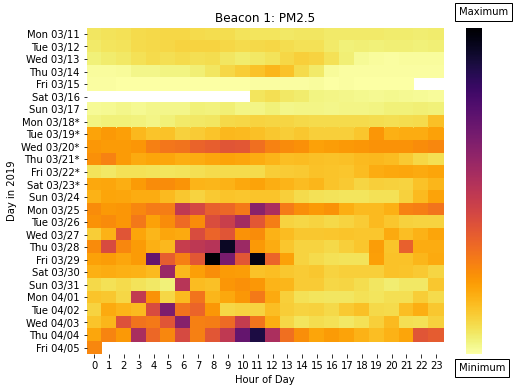

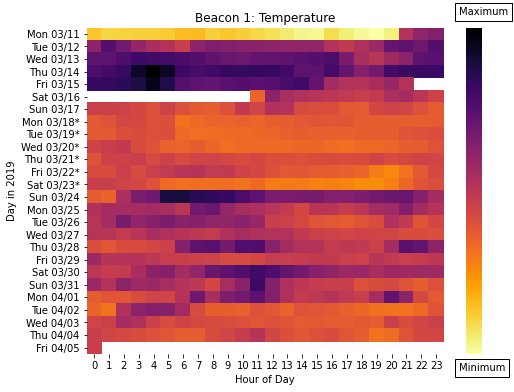

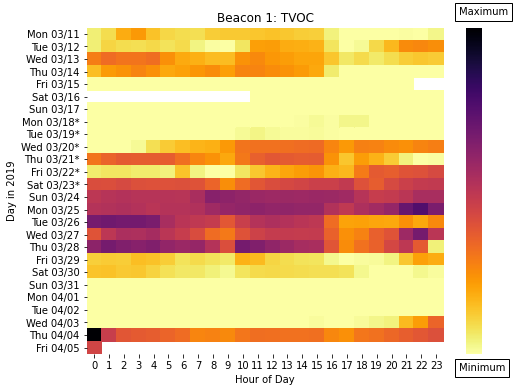

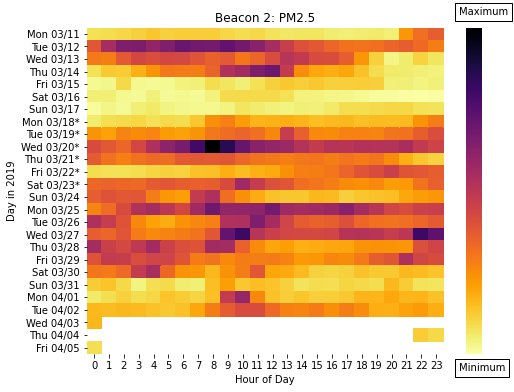

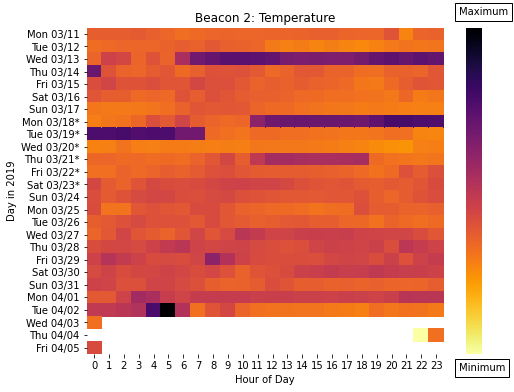

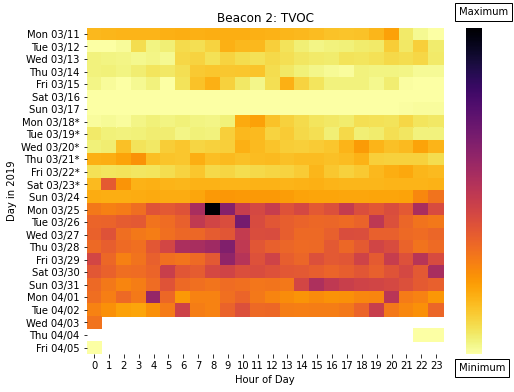

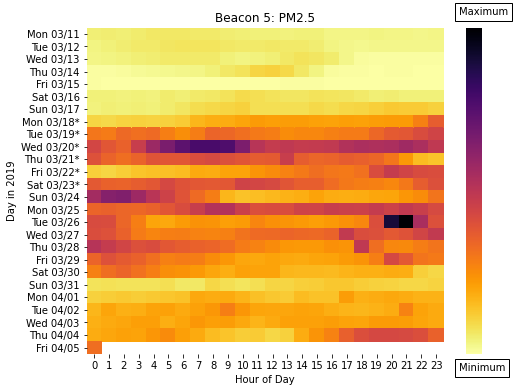

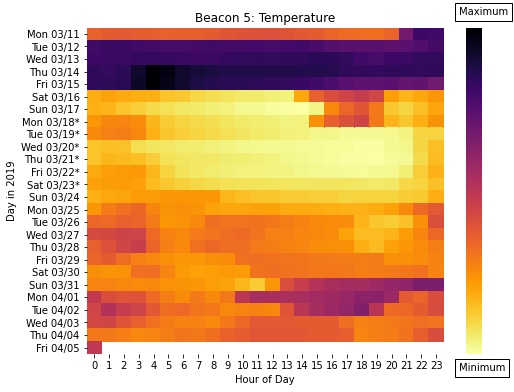

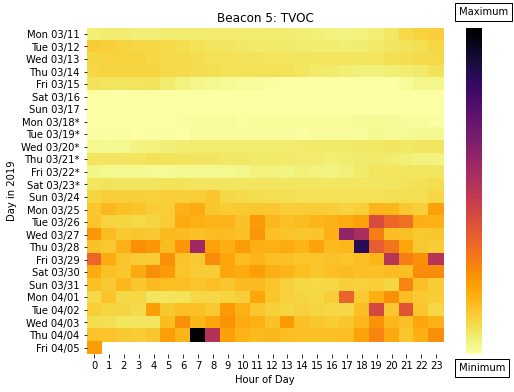

In [9]:
for no in [1,2,5]:
    df = beacons[beacons['number'] == no]
    df = df.resample('1h').mean()
    df['hour'] = df.index.hour
    df['day'] = df.index.date
    df = df.dropna()
    df = df[datetime(2019,3,11):datetime(2019,4,5)]
    df_hm = df.pivot_table(index='day',columns='hour',values='pm2.5')
    if len(df_hm) > 7:
        ax = plot_heat_map(df_hm)
        plt.savefig(f'/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/ut2000-beacon{no}-pm2p5-heatmap.png')
        ax.set_title(f'Beacon {no}: PM2.5')
        plt.show()
        plt.close()
    
    df_tc = df.pivot_table(index='day',columns='hour',values='TC')
    if len(df_tc) > 7:
        ax = plot_heat_map(df_tc)
        plt.savefig(f'/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/ut2000-beacon{no}-tc-heatmap.png')
        ax.set_title(f'Beacon {no}: Temperature')
        plt.show()
        plt.close()
        
    df_tvoc = df.pivot_table(index='day',columns='hour',values='TVOC')
    if len(df_tvoc) > 7:
        ax = plot_heat_map(df_tvoc)
        plt.savefig(f'/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/ut2000-beacon{no}-tvoc-heatmap.png')
        ax.set_title(f'Beacon {no}: TVOC')
        plt.show()
        plt.close()
        

### Everything
Now we combine all the beacons and all the sensors into one heat map. We still normalize the data, but now we do it per sensor for all the beacons.

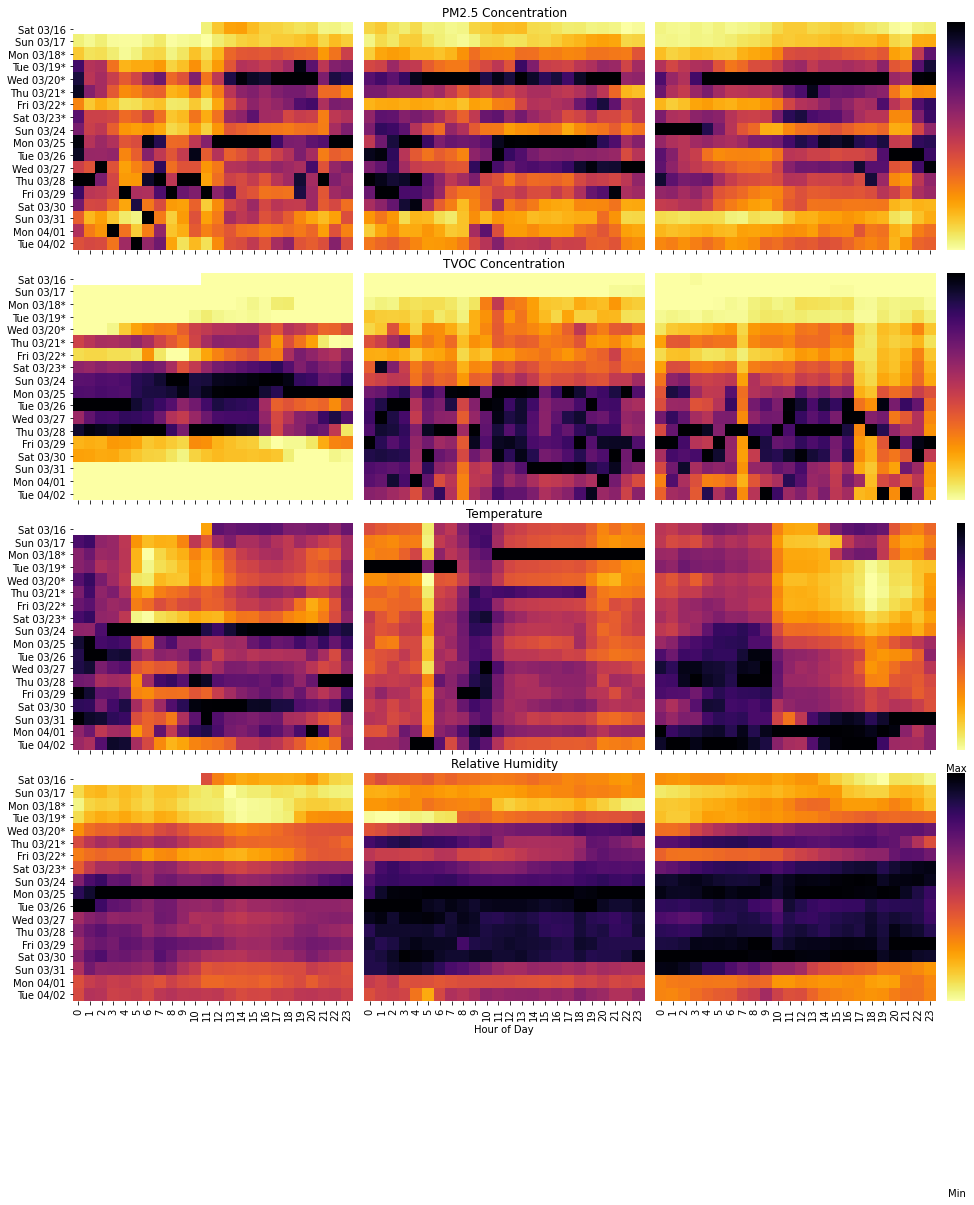

In [10]:
fig, ax = plt.subplots(4,4,figsize=(16,18),sharex='col',gridspec_kw={'width_ratios': [15, 15, 15, 1]})
row = 0
for value in ['pm2.5','TVOC','TC','RH']:
    col = 0
    for b in [1,2,5]:
        # Getting heatmap dataframe
        df = beacons[beacons['number'] == b]
        df = df.resample('1h').mean()
        df['hour'] = df.index.hour
        df['day'] = df.index.date
        df = df.dropna()
        df = df[datetime(2019,3,16):datetime(2019,4,2,23)]
        df_var = df.pivot_table(index='day',columns='hour',values=value)
        df_var /= np.max(df_var)
        # plotting with the colobar from the last figure
        if col == 2:
            sns.heatmap(df_var,cmap='inferno_r',ax=ax[row,col],cbar_ax=ax[row,col+1],cbar_kws={'ticks':[]})
        else:
            sns.heatmap(df_var,cmap='inferno_r',ax=ax[row,col], cbar=False)
        # Formatting axes
        ax[row,col].set_xlabel('')
        ax[row,col].set_ylabel('')
        if col == 0:
            labels = []
            for d in df_var.index:
                dd = datetime(d.year,d.month,d.day)
                if dd >= datetime(2019,3,18) and dd <= datetime(2019,3,23):
                    labels.append(datetime.strftime(d,'%a %m/%d')+'*')
                else:
                    labels.append(datetime.strftime(d,'%a %m/%d'))   
            #ax[row,col].set_yticks(df_var.index)
            ax[row,col].set_yticklabels(labels)
        else:
            ax[row,col].set_yticks([])

        if col == 1:
            if value == 'pm2.5':
                ax[row,col].set_title('PM2.5 Concentration')
            elif value == 'TVOC':
                ax[row,col].set_title('TVOC Concentration')
            elif value == 'TC':
                ax[row,col].set_title('Temperature')
            elif value == 'RH':
                ax[row,col].set_title('Relative Humidity')
                
            if row == 3:
                ax[row,col].set_xlabel('Hour of Day')
                
        col += 1
        
    row += 1
    
ax[3,3].text(0.75,0,'Min',zorder=10,ha='center',va='center')
ax[3,3].text(0.75,1,'Max',zorder=10,ha='center',va='bottom')
#ax[2,3].text(30,np.nanmin(df_rh),'Minimum',bbox={'facecolor':'white'},zorder=10,ha='center',va='top')
#ax[3,3].text(30,np.nanmax(df_rh),'Maximum',bbox={'facecolor':'white'},zorder=10,ha='center',va='bottom')
plt.subplots_adjust(wspace=0.05,hspace=0.1)
plt.savefig(f'/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/ut2000-beacon-comprehensive-heatmap.png')
plt.show()
plt.close()

### Split Heatmap

In [11]:
def create_cmap(colors,nodes):
    cmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
    return cmap

#### IAQ Heat Map
This heat map is NOT scaled but includes the actual values.

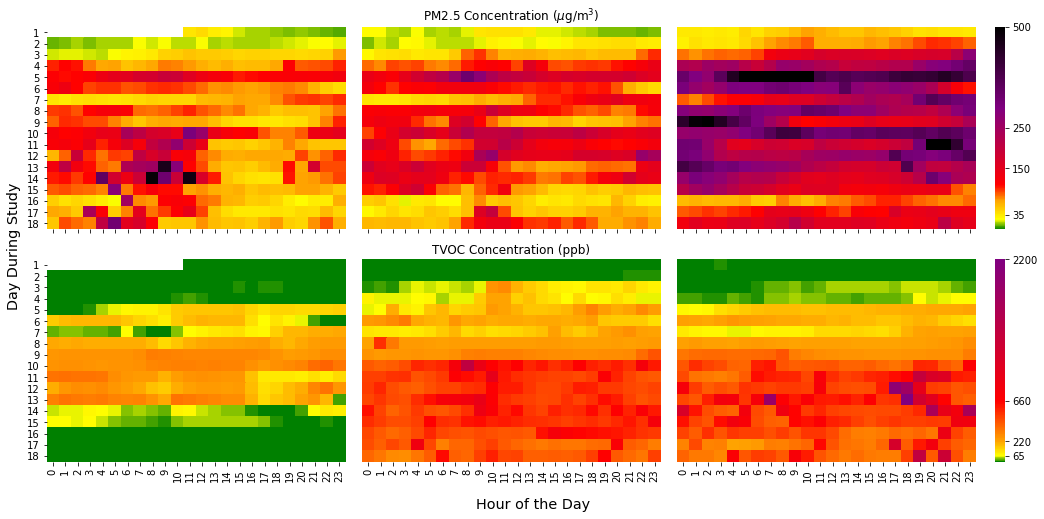

In [12]:
fig, ax = plt.subplots(2,3,figsize=(18,8),sharex='col',gridspec_kw={'width_ratios': [8, 8, 10]})
row = 0
for value in ['pm2.5','TVOC']:
    col = 0
    for b in [1,2,5]:
        # Getting heatmap dataframe
        df = beacons[beacons['number'] == b]
        df = df.resample('1h').mean()
        df['hour'] = df.index.hour
        df['day'] = df.index.date
        df = df.dropna()
        df = df[datetime(2019,3,16):datetime(2019,4,2,23)]
        df_var = df.pivot_table(index='day',columns='hour',values=value)
        # plotting with the colobar from the last figure
        if value == 'pm2.5':
            if col == 2:
                sns.heatmap(df_var,vmin=0,vmax=500,cmap=create_cmap(["green", "yellow", "orange", "red", "purple", "black"],[0.0, 0.048, 0.14, 0.22, 0.6, 1]),
                            ax=ax[row,col],cbar_kws={'ticks':[35,150,250,500]})
            else:
                sns.heatmap(df_var,vmin=0,vmax=500,cmap=create_cmap(["green", "yellow", "orange", "red", "purple", "black"],[0.0, 0.048, 0.14, 0.22, 0.6, 1]),
                            ax=ax[row,col], cbar=False)
        else:
            if col == 2:
                sns.heatmap(df_var,vmin=0,vmax=2200,cmap=create_cmap(["green", "yellow", "orange", "red", "purple"],[0.0, 0.03, 0.1, 0.3, 1]),
                            ax=ax[row,col],cbar_kws={'ticks':[65,220,660,2200]})
            else:
                sns.heatmap(df_var,vmin=0,vmax=2200,cmap=create_cmap(["green", "yellow", "orange", "red", "purple"],[0.0, 0.03, 0.1, 0.3, 1]),
                            ax=ax[row,col], cbar=False)
        # Formatting axes
        ax[row,col].set_xlabel('')
        ax[row,col].set_ylabel('')
        if col == 0:
            labels = np.arange(1,len(df_var)+1,1)
            ax[row,col].set_yticklabels(labels)
        else:
            ax[row,col].set_yticks([])

        if col == 1:
            if value == 'pm2.5':
                ax[row,col].set_title('PM2.5 Concentration ($\mu$g/m$^3$)')
            elif value == 'TVOC':
                ax[row,col].set_title('TVOC Concentration (ppb)')
                
        col += 1
        
    row += 1
    
fig.text(0.5, 0.05, 'Hour of the Day', ha='center', va='center',size='x-large')
fig.text(0.1, 0.5, 'Day During Study', ha='center', va='center', rotation='vertical',size='x-large')

plt.subplots_adjust(wspace=0.05,hspace=0.15)
plt.savefig(f'/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/ut2000-beacon-iaq-heatmap.pdf',bbox_inches='tight')
plt.show()
plt.close()

#### T/RH Heat Map
The T/RH values are scaled between 0 and 1. 

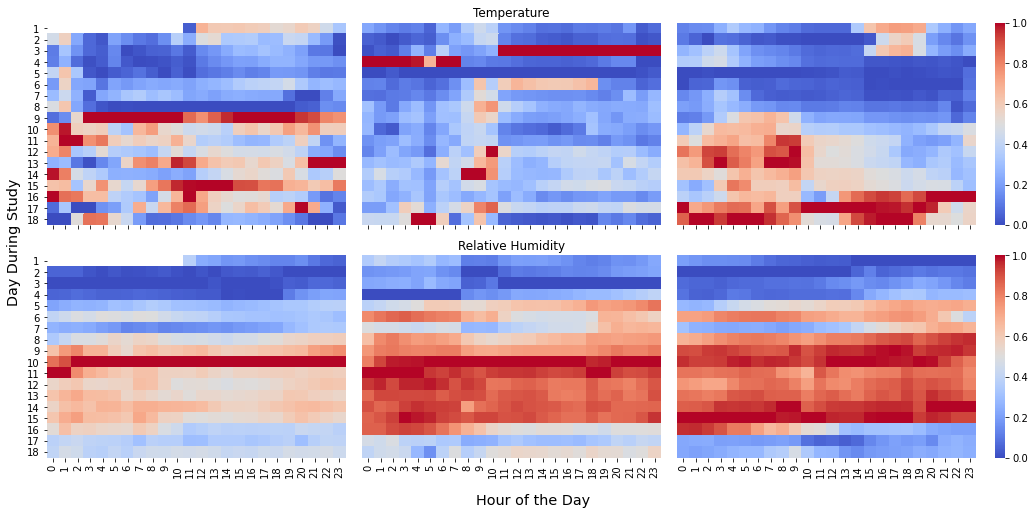

In [13]:
fig, ax = plt.subplots(2,3,figsize=(18,8),sharex='col',gridspec_kw={'width_ratios': [8, 8, 10]})
row = 0
for value in ['TC','RH']:
    col = 0
    for b in [1,2,5]:
        # Getting heatmap dataframe
        df = beacons[beacons['number'] == b]
        df = df.resample('1h').mean()
        df['hour'] = df.index.hour
        df['day'] = df.index.date
        df = df.dropna()
        df = df[datetime(2019,3,16):datetime(2019,4,2,23)]
        df_var = df.pivot_table(index='day',columns='hour',values=value)
        df_var = (df_var-df_var.min())/(df_var.max()-df_var.min())
        # plotting with the colobar from the last figure
        if col == 2:
            sns.heatmap(df_var,vmin=0,vmax=1,cmap='coolwarm',
                        ax=ax[row,col])
        else:
            sns.heatmap(df_var,vmin=0,vmax=1,cmap='coolwarm',
                        ax=ax[row,col], cbar=False)
        # Formatting axes
        ax[row,col].set_xlabel('')
        ax[row,col].set_ylabel('')
        if col == 0:
            labels = np.arange(1,len(df_var)+1,1)
            ax[row,col].set_yticklabels(labels)
        else:
            ax[row,col].set_yticks([])

        if col == 1:
            if value == 'TC':
                ax[row,col].set_title('Temperature')
            elif value == 'RH':
                ax[row,col].set_title('Relative Humidity')
                
        col += 1
        
    row += 1
    
fig.text(0.5, 0.05, 'Hour of the Day', ha='center', va='center',size='x-large')
fig.text(0.1, 0.5, 'Day During Study', ha='center', va='center', rotation='vertical',size='x-large')

plt.subplots_adjust(wspace=0.05,hspace=0.15)
plt.savefig(f'/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/ut2000-beacon-trh-heatmap.pdf',bbox_inches='tight')
plt.show()
plt.close()

## Beacon Covariance Plot
The covariance plot will give a nice look at the relationship between the four variables measured on the beacon2.0: PM, TVOC, Temperature, and RH.

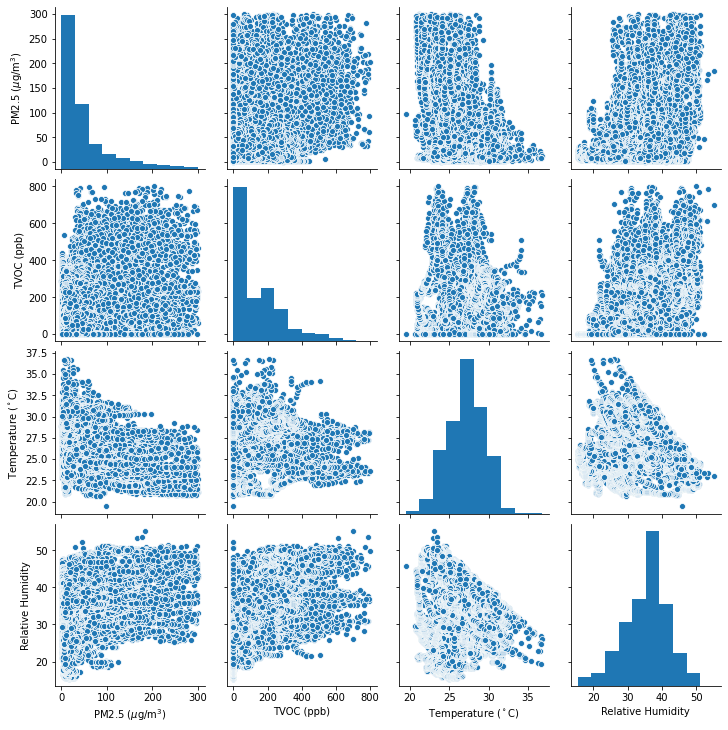

In [14]:
# Cleaning up the dataframe
## Removing high values
df = beacons[beacons['TVOC'] < 800]
df = df[df['pm2.5'] < 300]
## Removing and renaming columns
df = df[['pm2.5','TVOC','TC','RH']]
df.columns = ['PM2.5 ($\mu$g/m$^3$)','TVOC (ppb)', 'Temperature ($^\circ$C)', 'Relative Humidity']
# Plotting
sns.pairplot(df,corner=False)
plt.savefig('/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/ut2000-beacon-beacon-pairplot.png')
plt.show()
plt.close()

## Floor Type and PM/TVOC

In [15]:
# Getting only the ut200 responses and simplifying the dataframe
heh2000 = HEH[HEH['study'] == 'ut2000']
floor2000 = heh2000[['record_id', 'amt_carpet','hardwd_amt', 'tile_amt','beacon']]
floor2000

,record_id,amt_carpet,hardwd_amt,tile_amt,beacon
45,2030,0.0,0.0,100.0,7.0
46,2040,0.0,0.0,100.0,12.0
47,2105,0.0,50.0,50.0,9.0
48,2160,100.0,0.0,100.0,3.0
49,2197,0.0,0.0,100.0,8.0
50,2251,0.0,100.0,0.0,2.0
51,2404,0.0,100.0,0.0,1.0
52,2501,0.0,0.0,100.0,6.0
53,2603,0.0,0.0,90.0,5.0
54,2690,0.0,0.0,0.0,10.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


No dominant floor type for the participant with beacon 9.0
No dominant floor type for the participant with beacon 10.0


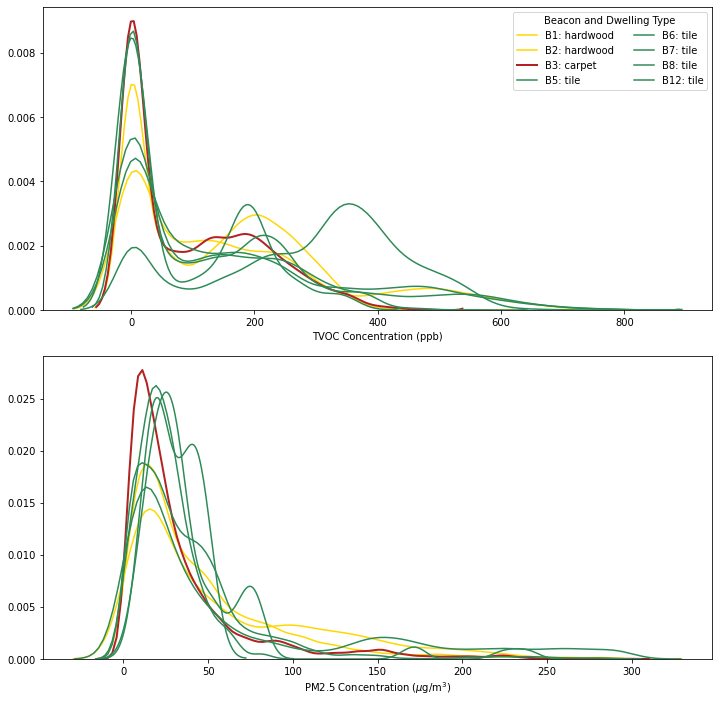

In [16]:
# Plotting the distributions of air pollutants based on floor type
fig, ax = plt.subplots(2,1,figsize=(12,12))
heh2000.sort_values(['beacon'],inplace=True)
for no in heh2000['beacon'].unique():
    df = beacons[beacons['number'] == no]
    # Removing high tvoc/pm values and resaving
    df_tvoc = df[df['TVOC'] < 800]
    df_pm = df[df['pm2.5'] < 300]
    # Getting the row from the heh that corresponds to the beacon
    floorBeacon = floor2000[floor2000['beacon'] == no]
    # Plotting with slightly different formats for each floor type
    if floorBeacon['amt_carpet'].values[0] > 80:
        sns.kdeplot(df_tvoc['TVOC'],linewidth=2,color='firebrick',ax=ax[0],label=f'B{str(no)[:-2]}: carpet')
        sns.kdeplot(df_pm['pm2.5'],linewidth=2,color='firebrick',ax=ax[1],label='_nolabel_')
    elif floorBeacon['hardwd_amt'].values[0] > 80:
        sns.kdeplot(df_tvoc['TVOC'],color='gold',ax=ax[0],label=f'B{str(no)[:-2]}: hardwood')
        sns.kdeplot(df_pm['pm2.5'],color='gold',ax=ax[1],label='_nolabel_')
    elif floorBeacon['tile_amt'].values[0] > 80:
        sns.kdeplot(df_tvoc['TVOC'],color='seagreen',ax=ax[0],label=f'B{str(no)[:-2]}: tile')
        sns.kdeplot(df_pm['pm2.5'],color='seagreen',ax=ax[1],label='_nolabel_')
    else:
        print(f'No dominant floor type for the participant with beacon {no}')
        
ax[0].legend(title='Beacon and Dwelling Type',loc='upper right',frameon=True,ncol=2)
ax[0].set_xlabel('TVOC Concentration (ppb)')
ax[1].set_xlabel('PM2.5 Concentration ($\mu$g/m$^3$)')
plt.subplots_adjust(hspace=0.15)
plt.savefig('../reports/figures/framework_paper/ut2000-beacon-heh-pollutants-flooring-distribution.png')
plt.show()
plt.close()

## Dwelling Type and Pollution
Now we look at the different dwelling type and see if that has an effect on the pollutant concentration.

In [17]:
dwelling2000 = heh2000[['record_id', 'livingsit','beacon']]
dwelling2000

,record_id,livingsit,beacon
51,2404,Apartment,1.0
50,2251,Apartment,2.0
48,2160,Apartment,3.0
53,2603,Apartment,5.0
52,2501,Apartment,6.0
45,2030,Apartment,7.0
49,2197,Apartment,8.0
47,2105,Stand-alone House,9.0
54,2690,Apartment,10.0
46,2040,Stand-alone House,12.0


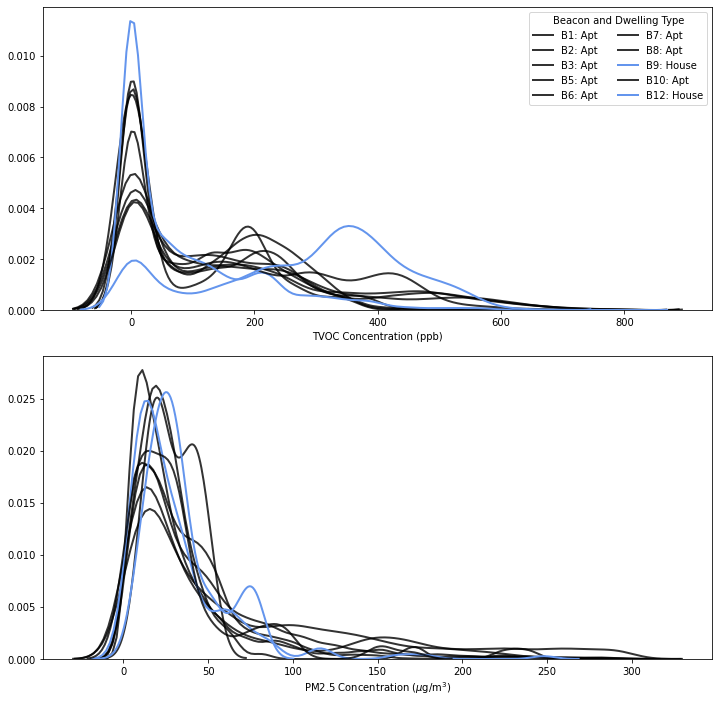

In [18]:
fig, ax = plt.subplots(2,1,figsize=(12,12))
for no in heh2000['beacon'].unique():
    df = beacons[beacons['number'] == no]
    # Removing high tvoc/pm values and resaving
    df_tvoc = df[df['TVOC'] < 800]
    df_pm = df[df['pm2.5'] < 300]
    # Getting the row from the heh that corresponds to the beacon
    dwellingBeacon = dwelling2000[dwelling2000['beacon'] == no]
    # Plotting with slightly different formats for each floor type
    if dwellingBeacon['livingsit'].values[0] == 'Apartment':
        sns.kdeplot(df_tvoc['TVOC'],linewidth=2,color='black',alpha=0.8,ax=ax[0],label=f'B{str(no)[:-2]}: Apt')
        sns.kdeplot(df_pm['pm2.5'],linewidth=2,color='black',alpha=0.8,ax=ax[1],label='_nolabel_')
    else:
        sns.kdeplot(df_tvoc['TVOC'],color='cornflowerblue',linewidth=2,ax=ax[0],label=f'B{str(no)[:-2]}: House')
        sns.kdeplot(df_pm['pm2.5'],color='cornflowerblue',linewidth=2,ax=ax[1],label='_nolabel_')
        
ax[0].legend(title='Beacon and Dwelling Type',loc='upper right',frameon=True,ncol=2)
ax[0].set_xlabel('TVOC Concentration (ppb)')
ax[1].set_xlabel('PM2.5 Concentration ($\mu$g/m$^3$)')
plt.subplots_adjust(hspace=0.15)
plt.savefig('../reports/figures/framework_paper/ut2000-beacon-heh-pollutants-dwelling-distribution.png')
plt.show()
plt.close()